In [1]:
# Import the required Libraries for data analysis and visualization

# Import numpy for numerical computations and array operations
import numpy as np

# Import pandas for data manipulation, reading CSV files, and DataFrame operations
import pandas as pd

# Import matplotlib.pyplot for creating basic plots and visualizations
import matplotlib.pyplot as plt

# Import seaborn for statistical data visualization and advanced plotting
import seaborn as sns

## Data Cleaning 

### Data Reading & Data Types 

In [2]:
# Read the data from CSV files into pandas DataFrames

# Load the Attribute DataSet which contains dress characteristics like size, style, price etc.
inp0 = pd.read_csv("2. Attribute DataSet.csv")

# Load the Dress Sales DataSet which contains sales data for different dates/seasons
inp1 = pd.read_csv("4. Dress Sales.csv")

You have “Attribute DataSet” which contains a column named “Price”. Choose the correct statement from the following about its data type and variable type.
- Integer type and numerical variable
- Object type and categorical ordinal variable
- Object type and categorical nominal variable
- Float type and categorical variable.


There is another column in “Attribute DataSet” named as “Recommendation”, choose the correct statement about its data type and variable type.
- Integer type and categorical
- Object type and categorical
- Integer type and continuous numerical
- Object type only.


Which of the following column do you think are of no use in “Attribute DataSet”.
- Dress_ID
- Price
- Size and material
- NeckLine
- None of the above


In [3]:
# Print the information about the attributes of inp0 and inp1 to understand data structure

# Display detailed information about inp0 (Attribute DataSet)
print("Information about inp0 (Attribute DataSet):")
inp0.info()  # Shows data types, non-null counts, memory usage

# Display first 5 rows of inp0 to see sample data
print("\nFirst few rows of inp0:")
inp0.head()  # Shows column names and sample values

# Display detailed information about inp1 (Dress Sales)
print("\nInformation about inp1 (Dress Sales):")
inp1.info()  # Shows data types, non-null counts, memory usage

# Display first 5 rows of inp1 to see sample data
print("\nFirst few rows of inp1:")
inp1.head()  # Shows column names and sample values

Information about inp0 (Attribute DataSet):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dress_ID        479 non-null    int64  
 1   Style           479 non-null    object 
 2   Price           477 non-null    object 
 3   Rating          479 non-null    float64
 4   Size            479 non-null    object 
 5   Season          477 non-null    object 
 6   NeckLine        476 non-null    object 
 7   SleeveLength    477 non-null    object 
 8   Material        360 non-null    object 
 9   FabricType      223 non-null    object 
 10  Decoration      255 non-null    object 
 11  Pattern Type    377 non-null    object 
 12  Recommendation  479 non-null    int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 48.8+ KB

First few rows of inp0:

Information about inp1 (Dress Sales):
<class 'pandas.core.frame.DataFrame'>
RangeIndex

,Dress_ID,29-08-2013,31-08-2013,09-02-2013,09-04-2013,09-06-2013,09-08-2013,09-10-2013,09-12-2013,14-09-2013,...,24-09-2013,26-09-2013,28-09-2013,30-09-2013,10-02-2013,10-04-2013,10-06-2013,10-08-2013,10-10-2013,10-12-2013
0,1.006033e+09,2114,2274,2491,2660,2727,2887,2930,3119,3204,...,3554,3624.0,3706,3746.0,3795.0,3832.0,3897,3923.0,3985.0,4048
1,1.212192e+09,151,275,570,750,813,1066,1164,1558,1756,...,2710,2942.0,3258,3354.0,3475.0,3654.0,3911,4024.0,4125.0,4277
2,1.190381e+09,6,7,7,7,8,8,9,10,10,...,11,11.0,11,11.0,11.0,11.0,11,11.0,11.0,11
3,9.660060e+08,1005,1128,1326,1455,1507,1621,1637,1723,1746,...,1878,1892.0,1914,1924.0,1929.0,1941.0,1952,1955.0,1959.0,1963
4,8.763395e+08,996,1175,1304,1396,1432,1559,1570,1638,1655,...,2032,2156.0,2252,2312.0,2387.0,2459.0,2544,2614.0,2693.0,2736


### Fixing the Rows and Columns 

As you can see, there is a column in “Attribute Dataset” named as ‘Size’. This column contains the values in abbreviation format. Write a code in Python to convert the followings:

- M into  “Medium”
- L into  “Large”
- XL into “Extra large”
- free into “Free”
- S, s & small into “Small”.

Now once you are done with changes in the dataset, what is the value of the lowest percentage, the highest percentage and the percentage of Small size categories in the column named “Size”?


In [4]:
# Column fixing: correcting size abbreviations and calculating percentages

# Step 1: Examine the current values in the Size column before making changes
print("Original Size values:")
print(inp0['Size'].value_counts())  # Count frequency of each size value
print("\n")

# Step 2: Convert size abbreviations to full descriptive names using dictionary mapping
inp0['Size'] = inp0['Size'].replace({
    'M': 'Medium',        # Convert 'M' abbreviation to 'Medium'
    'L': 'Large',         # Convert 'L' abbreviation to 'Large'
    'XL': 'Extra large',  # Convert 'XL' abbreviation to 'Extra large'
    'free': 'Free',       # Convert 'free' to proper case 'Free'
    'S': 'Small',         # Convert 'S' abbreviation to 'Small'
    's': 'Small',         # Convert lowercase 's' to 'Small'
    'small': 'Small'      # Convert 'small' to proper case 'Small'
})

# Step 3: Calculate percentage distribution of each size category
size_percentages = inp0['Size'].value_counts(normalize=True) * 100  # normalize=True gives proportions, *100 converts to percentages
print("Size category percentages:")
print(size_percentages)
print("\n")

# Step 4: Find specific statistics - lowest, highest, and Small size percentages
lowest_percentage = size_percentages.min()    # Find minimum percentage value
highest_percentage = size_percentages.max()   # Find maximum percentage value
small_percentage = size_percentages.get('Small', 0)  # Get percentage for 'Small' category, default to 0 if not found

# Step 5: Display the calculated statistics with proper formatting
print(f"Lowest percentage: {lowest_percentage:.2f}%")   # Display with 2 decimal places
print(f"Highest percentage: {highest_percentage:.2f}%") # Display with 2 decimal places
print(f"Small size percentage: {small_percentage:.2f}%") # Display with 2 decimal places


Original Size values:
Size
M        171
free     165
L         93
S         34
XL        14
small      1
s          1
Name: count, dtype: int64


Size category percentages:
Size
Medium         35.699374
Free           34.446764
Large          19.415449
Small           7.515658
Extra large     2.922756
Name: proportion, dtype: float64


Lowest percentage: 2.92%
Highest percentage: 35.70%
Small size percentage: 7.52%


In [5]:
# Verify the size column corrections by displaying updated value counts

# Display the count of each size category after applying corrections
print("Value counts of Size categories after corrections:")
print(inp0['Size'].value_counts())  # Shows frequency count for each size category
print("\n")

# Display the percentage distribution of size categories
print("Percentage distribution:")
print(inp0['Size'].value_counts(normalize=True) * 100)  # Shows percentage for each category


Value counts of Size categories after corrections:
Size
Medium         171
Free           165
Large           93
Small           36
Extra large     14
Name: count, dtype: int64


Percentage distribution:
Size
Medium         35.699374
Free           34.446764
Large          19.415449
Small           7.515658
Extra large     2.922756
Name: proportion, dtype: float64


### Impute/Remove Missing values

In [6]:
# Analyze missing values in both datasets to understand data quality

# Check for null/missing values in inp0 (Attribute DataSet)
print("Null counts for inp0 (Attribute DataSet):")
print(inp0.isnull().sum())  # Count null values in each column of inp0
print("\n" + "=" * 50 + "\n")  # Print separator line for clarity

# Check for null/missing values in inp1 (Dress Sales)
print("Null counts for inp1 (Dress Sales):")
print(inp1.isnull().sum())  # Count null values in each column of inp1

Null counts for inp0 (Attribute DataSet):
Dress_ID            0
Style               0
Price               2
Rating              0
Size                0
Season              2
NeckLine            3
SleeveLength        2
Material          119
FabricType        256
Decoration        224
Pattern Type      102
Recommendation      0
dtype: int64


Null counts for inp1 (Dress Sales):
Dress_ID        0
29-08-2013      0
31-08-2013      0
09-02-2013      0
09-04-2013      0
09-06-2013      0
09-08-2013      0
09-10-2013      0
09-12-2013      0
14-09-2013      0
16-09-2013      0
18-09-2013      0
20-09-2013      0
22-09-2013      0
24-09-2013      0
26-09-2013    222
28-09-2013      0
30-09-2013    257
10-02-2013    259
10-04-2013    258
10-06-2013      0
10-08-2013    255
10-10-2013    255
10-12-2013      0
dtype: int64


You are given another dataset named “Dress Sales”. Now if you observe the datatypes of the columns using ‘inp1.info()’ command, you can identify that there are certain columns defined as object data type though they primarily consist of numeric data.

Now if you try and convert these object data type columns into numeric data type(float), you will come across an error message. Try to correct this error.







In [7]:
# Analyze data types in inp1 (Dress Sales) to identify conversion issues

# Display comprehensive information about inp1 data structure
print("Data types information of inp1 (Dress Sales):")
print(inp1.info())  # Shows column names, data types, non-null counts, memory usage
print("\n" + "=" * 50 + "\n")  # Print separator for visual clarity

# Display summary of data types for each column
print("Data types summary:")
print(inp1.dtypes)  # Shows just the data type of each column
print("\n" + "=" * 50 + "\n")  # Print separator for visual clarity

# Identify columns that are currently stored as 'object' type (usually strings)
print("object type columns in inp1:")
object_columns = inp1.select_dtypes(include=['object']).columns.tolist()  # Filter columns with object data type
print(object_columns)  # Display list of object columns

# Display sample data to understand what the data looks like
print("\nFirst few rows to see the data:")
print(inp1.head())  # Show first 5 rows to inspect actual values

Data types information of inp1 (Dress Sales):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    479 non-null    float64
 1   29-08-2013  479 non-null    int64  
 2   31-08-2013  479 non-null    int64  
 3   09-02-2013  479 non-null    int64  
 4   09-04-2013  479 non-null    int64  
 5   09-06-2013  479 non-null    int64  
 6   09-08-2013  479 non-null    int64  
 7   09-10-2013  479 non-null    int64  
 8   09-12-2013  479 non-null    object 
 9   14-09-2013  479 non-null    object 
 10  16-09-2013  479 non-null    object 
 11  18-09-2013  479 non-null    object 
 12  20-09-2013  479 non-null    object 
 13  22-09-2013  479 non-null    object 
 14  24-09-2013  479 non-null    int64  
 15  26-09-2013  257 non-null    float64
 16  28-09-2013  479 non-null    int64  
 17  30-09-2013  222 non-null    float64
 18  10-02-2013  220 non-null

In [8]:
# Demonstrate the error that occurs when trying to convert object columns to float directly

# Step 1: Identify all object type columns in the dataset
print("Object columns in inp1:")
object_cols = inp1.select_dtypes(include=['object']).columns.tolist()  # Get list of object columns
print(object_cols)

# Step 2: Attempt direct conversion to float to show the error
print("\nAttempting direct conversion to float:")
try:
    # Loop through each object column
    for col in object_cols:
        if col != 'Dress_ID':  # Skip Dress_ID as it should remain as string identifier
            print(f"Converting {col}...")  # Show which column is being processed
            inp1[col] = inp1[col].astype(float)  # Try to convert to float - this will cause error
            print(f"{col} converted successfully")  # This won't execute due to error
except Exception as e:
    # Catch and display the error that occurs during conversion
    print(f"Error encountered: {e}")  # Show the actual error message
    print("This error occurs because there are non-numeric string values in the data")  # Explain why error happened

Object columns in inp1:
['09-12-2013', '14-09-2013', '16-09-2013', '18-09-2013', '20-09-2013', '22-09-2013']

Attempting direct conversion to float:
Converting 09-12-2013...
Error encountered: could not convert string to float: 'Removed'
This error occurs because there are non-numeric string values in the data


In [9]:
# Do the required changes in the "Dress Sales" data set to get null values on string values.

# Convert non-numeric string values to NaN to enable proper data type conversion

# Step 1: Announce the conversion process
print("Converting non-numeric string values to NaN...")

# Step 2: Get object columns excluding Dress_ID (which should remain as string)
object_cols = inp1.select_dtypes(include=['object']).columns.tolist()  # Get all object columns
if 'Dress_ID' in object_cols:
    object_cols.remove('Dress_ID')  # Remove Dress_ID from conversion list

# Step 3: Examine unique values in each object column to understand the data
for col in object_cols:
    print(f"\nUnique values in {col}:")  # Show which column we're examining
    print(inp1[col].unique()[:10])  # Display first 10 unique values to see what's causing issues

# Step 4: Clean and convert each object column
for col in object_cols:
    # Convert all values to string first to handle mixed data types
    inp1[col] = inp1[col].astype(str)  # Ensure all values are strings before processing
    
    # Replace common representations of missing/null values with actual NaN
    inp1[col] = inp1[col].replace(['nan', 'NaN', 'NULL', 'null', '', ' ', 'None'], np.nan)
    
    # Convert to numeric, forcing non-numeric strings to become NaN
    inp1[col] = pd.to_numeric(inp1[col], errors='coerce')  # errors='coerce' converts invalid values to NaN

# Step 5: Display results of the conversion
print("\nString values have been converted to NaN values")
print("Null counts after conversion:")
print(inp1.isnull().sum())  # Show how many null values we now have in each column

Converting non-numeric string values to NaN...

Unique values in 09-12-2013:
['3119' '1558' '10' '1723' '1638' '18' '251' '117' '17' '13']

Unique values in 14-09-2013:
['3204' '1756' '10' '1746' '1655' '19' '262' '121' '17' '13']

Unique values in 16-09-2013:
['3277' '1878' '10' '1783' '1681' '20' '289' '125' '19' '13']

Unique values in 18-09-2013:
['3321' '1985' '10' '1796' '1743' '20' '295' '135' '21' '13']

Unique values in 20-09-2013:
['3386' '2106' '10' '1812' '1824' '21' '325' '142' '25' '14']

Unique values in 22-09-2013:
['3479' '2454' '11' '1845' '1919' '22' '353' '150' '27' '14']

String values have been converted to NaN values
Null counts after conversion:
Dress_ID        0
29-08-2013      0
31-08-2013      0
09-02-2013      0
09-04-2013      0
09-06-2013      0
09-08-2013      0
09-10-2013      0
09-12-2013      1
14-09-2013      1
16-09-2013      1
18-09-2013      1
20-09-2013      1
22-09-2013      1
24-09-2013      0
26-09-2013    222
28-09-2013      0
30-09-2013    25

In [10]:
# Convert the object type columns in "Dress Sales" into float type of data type.

# Now convert the cleaned columns to float 
# Step 1: Announce the conversion process
print("Converting object columns to float type...")

# Step 2: Get object columns again (excluding Dress_ID which should remain as string)
object_cols = inp1.select_dtypes(include=['object']).columns.tolist()  # Get current object columns
if 'Dress_ID' in object_cols:
    object_cols.remove('Dress_ID')  # Keep Dress_ID as string identifier

print(f"Columns to convert: {object_cols}")  # Show which columns will be converted

# Step 3: Convert each column to float with error handling
# convert to float
for col in object_cols:
    try:
        # Attempt to convert column to float data type
        inp1[col] = inp1[col].astype(float)  # Convert to float
        print(f"{col} converted to float successfully")  # Confirm successful conversion
    except Exception as e:
        # Handle any errors that might occur during conversion
        # Show error details
        print(f"Error converting {col}: {e}")  

# Step 4: Verify the conversion by checking data types
print("\nData types after conversion:")
print(inp1.dtypes)  # Display data types of all columns

# Step 5: Display comprehensive dataset information
print("\nDetailed information after conversion:")
inp1.info()  # Show detailed info including data types and memory usage

Converting object columns to float type...
Columns to convert: []

Data types after conversion:
Dress_ID      float64
29-08-2013      int64
31-08-2013      int64
09-02-2013      int64
09-04-2013      int64
09-06-2013      int64
09-08-2013      int64
09-10-2013      int64
09-12-2013    float64
14-09-2013    float64
16-09-2013    float64
18-09-2013    float64
20-09-2013    float64
22-09-2013    float64
24-09-2013      int64
26-09-2013    float64
28-09-2013      int64
30-09-2013    float64
10-02-2013    float64
10-04-2013    float64
10-06-2013      int64
10-08-2013    float64
10-10-2013    float64
10-12-2013      int64
dtype: object

Detailed information after conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    479 non-null    float64
 1   29-08-2013  479 non-null    int64  
 2   31-08-2013  479 non-null    int64  
 3   09-02-2

When you see the null counts in “Dress Sales” dataset after performing all the operations that have been mentioned in jupyter notebook, you will find that there are some columns in “Dress Sales” data where there are more than 40% of missing values. Based on your understanding of dealing with missing values do the following steps.

In [11]:
# Calculate and display the null percentage for each column in inp1 (Dress Sales)

# Step 1: Calculate null percentage for each column
null_percentage = (inp1.isnull().sum() / len(inp1)) * 100  # (null count / total rows) * 100

# Step 2: Display null percentages sorted from highest to lowest
print("Null percentage for each column in inp1 (Dress Sales):")
print(null_percentage.sort_values(ascending=False))  # Sort in descending order to see worst columns first

# Step 3: Display total number of rows for context
print(f"\nTotal rows in dataset: {len(inp1)}")  # Show total dataset size

# Step 4: Identify columns with more than 40% missing values
print("\nColumns with more than 40% missing values:")
high_null_cols = null_percentage[null_percentage > 40]  # Filter columns with >40% nulls
print(high_null_cols)  # Display problematic columns

Null percentage for each column in inp1 (Dress Sales):
10-02-2013    54.070981
10-04-2013    53.862213
30-09-2013    53.653445
10-08-2013    53.235908
10-10-2013    53.235908
26-09-2013    46.346555
09-12-2013     0.208768
16-09-2013     0.208768
14-09-2013     0.208768
22-09-2013     0.208768
20-09-2013     0.208768
18-09-2013     0.208768
09-02-2013     0.000000
31-08-2013     0.000000
29-08-2013     0.000000
Dress_ID       0.000000
09-10-2013     0.000000
09-08-2013     0.000000
09-06-2013     0.000000
09-04-2013     0.000000
24-09-2013     0.000000
28-09-2013     0.000000
10-06-2013     0.000000
10-12-2013     0.000000
dtype: float64

Total rows in dataset: 479

Columns with more than 40% missing values:
26-09-2013    46.346555
30-09-2013    53.653445
10-02-2013    54.070981
10-04-2013    53.862213
10-08-2013    53.235908
10-10-2013    53.235908
dtype: float64


In [12]:
# Drop columns with more than 40% missing values from inp1 (Dress Sales dataset)

# Step 1: Calculate null percentage for each column to identify problematic columns
null_percentage = (inp1.isnull().sum() / len(inp1)) * 100  # Calculate percentage of null values

# Step 2: Identify columns that have more than 40% missing values
cols_to_drop = null_percentage[null_percentage > 40].index.tolist()  # Get column names with >40% nulls

# Step 3: Display information before dropping columns
print(f"Columns to drop (> 40% missing values): {cols_to_drop}")  # Show which columns will be removed
print(f"Number of columns before dropping: {inp1.shape[1]}")  # Show current number of columns

# Step 4: Drop the identified columns from the dataset
inp1.drop(columns=cols_to_drop, inplace=True)  # Remove columns permanently (inplace=True modifies original)

# Step 5: Display results after dropping columns
print(f"Number of columns after dropping: {inp1.shape[1]}")  # Show new number of columns
print(f"Dropped columns: {cols_to_drop}")  # Confirm which columns were removed
print("\nRemaining null counts:")  # Check remaining null values
print(inp1.isnull().sum())  # Display null counts for remaining columns

Columns to drop (> 40% missing values): ['26-09-2013', '30-09-2013', '10-02-2013', '10-04-2013', '10-08-2013', '10-10-2013']
Number of columns before dropping: 24
Number of columns after dropping: 18
Dropped columns: ['26-09-2013', '30-09-2013', '10-02-2013', '10-04-2013', '10-08-2013', '10-10-2013']

Remaining null counts:
Dress_ID      0
29-08-2013    0
31-08-2013    0
09-02-2013    0
09-04-2013    0
09-06-2013    0
09-08-2013    0
09-10-2013    0
09-12-2013    1
14-09-2013    1
16-09-2013    1
18-09-2013    1
20-09-2013    1
22-09-2013    1
24-09-2013    0
28-09-2013    0
10-06-2013    0
10-12-2013    0
dtype: int64


You should categorise the dates into seasons in “Dress Sales” data to simplify the analysis according to the following criteria:
- June, July and August: Summer.
- September, October and November: Autumn.
- December, January and February: WInter.
- March, April and May: Spring.




In [13]:
# Create four season columns by categorizing dates according to specified criteria
# Summer: June, July, August (months 6, 7, 8)
# Autumn: September, October, November (months 9, 10, 11)
# Winter: December, January, February (months 12, 1, 2)
# Spring: March, April, May (months 3, 4, 5)

# Step 1: Examine current columns to identify date columns
print("Current columns in inp1:")
print(inp1.columns.tolist())  # Display all column names

# Step 2: Identify date columns by looking for DD-MM-YYYY format
date_columns = [col for col in inp1.columns if '-' in str(col) and len(str(col)) == 10]
print(f"\nDate columns found: {date_columns}")  # Show identified date columns

# Step 3: Initialize season columns with zero values
inp1['Summer'] = 0   # Initialize Summer sales column (June, July, August)
inp1['Autumn'] = 0   # Initialize Autumn sales column (September, October, November)
inp1['Winter'] = 0   # Initialize Winter sales column (December, January, February)
inp1['Spring'] = 0   # Initialize Spring sales column (March, April, May)

# Step 4: Process each date column and aggregate sales by season
for col in date_columns:
    try:
        # Extract month from date column name (format: DD-MM-YYYY)
        month = int(col.split('-')[1])  # Split by '-' and get middle part (month)
        
        # Add sales data to appropriate season based on month number
        if month in [6, 7, 8]:  # Summer months
            inp1['Summer'] += inp1[col].fillna(0)  # Add to Summer, replace NaN with 0
        elif month in [9, 10, 11]:  # Autumn months
            inp1['Autumn'] += inp1[col].fillna(0)  # Add to Autumn, replace NaN with 0
        elif month in [12, 1, 2]:  # Winter months
            inp1['Winter'] += inp1[col].fillna(0)  # Add to Winter, replace NaN with 0
        elif month in [3, 4, 5]:  # Spring months
            inp1['Spring'] += inp1[col].fillna(0)  # Add to Spring, replace NaN with 0
            
    except (ValueError, IndexError):
        # Handle errors if date format is unexpected
        print(f"Could not process column {col}")  # Show which column caused issues

# Step 5: Confirm successful creation of season columns
print("\nSeason columns added successfully!")
print("Sample of season totals:")
print(inp1[['Summer', 'Autumn', 'Winter', 'Spring']].head())  # Display first few rows of season data


Current columns in inp1:
['Dress_ID', '29-08-2013', '31-08-2013', '09-02-2013', '09-04-2013', '09-06-2013', '09-08-2013', '09-10-2013', '09-12-2013', '14-09-2013', '16-09-2013', '18-09-2013', '20-09-2013', '22-09-2013', '24-09-2013', '28-09-2013', '10-06-2013', '10-12-2013']

Date columns found: ['29-08-2013', '31-08-2013', '09-02-2013', '09-04-2013', '09-06-2013', '09-08-2013', '09-10-2013', '09-12-2013', '14-09-2013', '16-09-2013', '18-09-2013', '20-09-2013', '22-09-2013', '24-09-2013', '28-09-2013', '10-06-2013', '10-12-2013']

Season columns added successfully!
Sample of season totals:
   Summer   Autumn  Winter  Spring
0   13899  26857.0  9658.0    2660
1    6216  17311.0  6405.0     750
2      40     82.0    28.0       7
3    7213  14411.0  5012.0    1455
4    7706  14676.0  5678.0    1396


In [14]:
# calculate the sum of sales in each seasons in inp1 i.e. "Dress Sales".
# Calculate the sum of sales in each seasons in inp1 i.e. "Dress Sales".

# Calculate and analyze total sales for each season in inp1 (Dress Sales dataset)

# Step 1: Calculate total sales for each season across all dresses
season_totals = {
    'Summer': inp1['Summer'].sum(),   # Sum all Summer sales across all rows
    'Autumn': inp1['Autumn'].sum(),   # Sum all Autumn sales across all rows
    'Winter': inp1['Winter'].sum(),   # Sum all Winter sales across all rows
    'Spring': inp1['Spring'].sum()    # Sum all Spring sales across all rows
}

# Step 2: Display total sales by season with formatting
print("Total sales by season:")
print("="*30)
for season, total in season_totals.items():
    print(f"{season}: {total:,.0f}")  # Format numbers with commas for readability

# Step 3: Calculate overall total sales across all seasons
print(f"\nOverall total sales: {sum(season_totals.values()):,.0f}")

# Step 4: Identify seasons with highest and lowest sales
max_season = max(season_totals, key=season_totals.get)  # Find season with maximum sales
min_season = min(season_totals, key=season_totals.get)  # Find season with minimum sales

print(f"\nHighest sales season: {max_season} ({season_totals[max_season]:,.0f})")
print(f"Lowest sales season: {min_season} ({season_totals[min_season]:,.0f})")

# Step 5: Generate statistical summary for all season columns
print("\nSeason statistics:")
print(inp1[['Summer', 'Autumn', 'Winter', 'Spring']].describe())  # Show count, mean, std, min, quartiles, max

Total sales by season:
Summer: 691,907
Autumn: 1,363,288
Winter: 474,683
Spring: 143,600

Overall total sales: 2,673,478

Highest sales season: Autumn (1,363,288)
Lowest sales season: Spring (143,600)

Season statistics:
             Summer        Autumn        Winter       Spring
count    479.000000    479.000000    479.000000   479.000000
mean    1444.482255   2846.112735    990.987474   299.791232
std     2976.993959   5004.985872   1849.754847   601.716515
min        2.000000      1.000000      0.000000     1.000000
25%      156.500000    410.500000    122.000000    28.500000
50%      518.000000   1334.000000    402.000000   110.000000
75%     1475.500000   3126.000000   1096.000000   308.500000
max    35577.000000  55532.000000  20388.000000  7374.000000


Now let's merge inp1 with inp0 with left join manner, so that the information of inp0 should remain intact.

In [15]:
# Merge inp0 (Attribute DataSet) with inp1 (Dress Sales) using left join
# This preserves all records from inp0 and adds matching sales data from inp1

# Perform left merge: keep all rows from inp0, add columns from inp1 where Dress_ID matches
inp0 = pd.merge(left=inp0,           # Left dataset (Attribute DataSet) - all rows preserved
                right=inp1,          # Right dataset (Dress Sales) - matching rows added
                how='left',          # Left join - keep all left records
                left_on='Dress_ID',  # Join key from left dataset
                right_on='Dress_ID') # Join key from right dataset

# Display first few rows to verify the merge worked correctly
inp0.head()  # Show sample of merged data

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,...,20-09-2013,22-09-2013,24-09-2013,28-09-2013,10-06-2013,10-12-2013,Summer,Autumn,Winter,Spring
0,1006032852,Sexy,Low,4.6,Medium,Summer,o-neck,sleevless,NaN,chiffon,...,3386.0,3479.0,3554,3706,3897,4048,13899,26857.0,9658.0,2660
1,1212192089,Casual,Low,0.0,Large,Summer,o-neck,Petal,microfiber,NaN,...,2106.0,2454.0,2710,3258,3911,4277,6216,17311.0,6405.0,750
2,1190380701,vintage,High,0.0,Large,Automn,o-neck,full,polyster,NaN,...,10.0,11.0,11,11,11,11,40,82.0,28.0,7
3,966005983,Brief,Average,4.6,Large,Spring,o-neck,full,silk,chiffon,...,1812.0,1845.0,1878,1914,1952,1963,7213,14411.0,5012.0,1455
4,876339541,cute,Low,4.5,Medium,Summer,o-neck,butterfly,chiffonfabric,chiffon,...,1824.0,1919.0,2032,2252,2544,2736,7706,14676.0,5678.0,1396


In [16]:
# Now Drop the Date columns from inp0 as it is already combined into four seasons.

# Remove individual date columns since they've been aggregated into seasonal columns

# Step 1: Identify all date columns in DD-MM-YYYY format
date_columns = [col for col in inp0.columns if '-' in str(col) and len(str(col)) == 10]

# Step 2: Display information about columns to be dropped
print(f"Date columns to drop: {date_columns}")  # Show which columns will be removed
print(f"Number of columns before dropping: {inp0.shape[1]}")  # Show current column count

# Step 3: Drop date columns if any exist
if date_columns:
    inp0.drop(columns=date_columns, inplace=True)  # Remove date columns permanently
    print(f"Successfully dropped {len(date_columns)} date columns")  # Confirm removal
else:
    print("No date columns found to drop")  # Handle case where no date columns exist

# Step 4: Display results after dropping columns
print(f"Number of columns after dropping: {inp0.shape[1]}")  # Show new column count

# Step 5: Check remaining data quality
print("\nNull counts after dropping date columns:")
print(inp0.isnull().sum().sum(), "total null values")  # Count total missing values

# Step 6: Verify the dataset structure after changes
print("\nFirst few rows after dropping date columns:")
print(inp0.head())  # Display sample data to confirm structure

Date columns to drop: ['29-08-2013', '31-08-2013', '09-02-2013', '09-04-2013', '09-06-2013', '09-08-2013', '09-10-2013', '09-12-2013', '14-09-2013', '16-09-2013', '18-09-2013', '20-09-2013', '22-09-2013', '24-09-2013', '28-09-2013', '10-06-2013', '10-12-2013']
Number of columns before dropping: 34
Successfully dropped 17 date columns
Number of columns after dropping: 17

Null counts after dropping date columns:
710 total null values

First few rows after dropping date columns:
     Dress_ID    Style    Price  Rating    Size  Season NeckLine SleeveLength  \
0  1006032852     Sexy      Low     4.6  Medium  Summer   o-neck    sleevless   
1  1212192089   Casual      Low     0.0   Large  Summer   o-neck        Petal   
2  1190380701  vintage     High     0.0   Large  Automn   o-neck         full   
3   966005983    Brief  Average     4.6   Large  Spring   o-neck         full   
4   876339541     cute      Low     4.5  Medium  Summer   o-neck    butterfly   

        Material FabricType  De

Print the null count of inp0 to get the idea about the missing values in data set.

In [17]:
# Analyze missing values in the combined dataframe (inp0 after merging with inp1)

# Step 1: Display null counts for each column
print("Null counts for inp0 (combined dataframe):")
print(inp0.isnull().sum())  # Count missing values in each column

# Step 2: Provide context about dataset size
print(f"\nTotal rows in dataset: {len(inp0)}")  # Show total number of records

# Step 3: Calculate and display null percentages for better understanding
null_percentage = (inp0.isnull().sum() / len(inp0)) * 100  # Calculate percentage of missing values
print("\nNull percentages:")
print(null_percentage.sort_values(ascending=False))  # Sort from highest to lowest percentage


Null counts for inp0 (combined dataframe):
Dress_ID            0
Style               0
Price               2
Rating              0
Size                0
Season              2
NeckLine            3
SleeveLength        2
Material          119
FabricType        256
Decoration        224
Pattern Type      102
Recommendation      0
Summer              0
Autumn              0
Winter              0
Spring              0
dtype: int64

Total rows in dataset: 479

Null percentages:
FabricType        53.444676
Decoration        46.764092
Material          24.843424
Pattern Type      21.294363
NeckLine           0.626305
Price              0.417537
SleeveLength       0.417537
Season             0.417537
Dress_ID           0.000000
Rating             0.000000
Style              0.000000
Size               0.000000
Recommendation     0.000000
Summer             0.000000
Autumn             0.000000
Winter             0.000000
Spring             0.000000
dtype: float64


You can see that there are two types of variables one with a large number of missing values and another is very less number of missing values. These two columns can be categorized as:

Type-1: Missing values are very less (around 2 or 3 missing values): Price, Season, NeckLine, SleeveLength, Winter and Autumn. 

Type-2: Missing values are large in numbers (more than 15%): Material, FabricType, Decoration and Pattern Type.



In [18]:
# Handle Type-1 missing values: columns with very few missing values (2-3 missing)
# Strategy: Use mode (most frequent value) for categorical, median for numerical

# Step 1: Define Type-1 columns (those with minimal missing values)
type1_columns = ['Price', 'Season', 'NeckLine', 'SleeveLength', 'Winter', 'Autumn']

# Step 2: Display current state of missing values
print("Handling Type-1 missing values:")
print("Before handling:")
for col in type1_columns:
    if col in inp0.columns:  # Check if column exists in dataset
        print(f"{col}: {inp0[col].isnull().sum()} missing values")  # Show current null count

print("\n" + "="*50 + "\n")  # Visual separator

# Step 3: Process each Type-1 column with appropriate imputation strategy
for col in type1_columns:
    if col in inp0.columns:  # Verify column exists
        missing_count = inp0[col].isnull().sum()  # Count missing values
        
        if missing_count > 0:  # Only process if there are missing values
            if inp0[col].dtype == 'object':  # Categorical data (string/object type)
                mode_value = inp0[col].mode()[0]  # Get most frequent value
                inp0[col].fillna(mode_value, inplace=True)  # Fill missing with mode
                print(f"{col} (categorical): Filled {missing_count} missing values with mode '{mode_value}'")
            else:  # Numerical data (float/int type)
                median_value = inp0[col].median()  # Get median value
                inp0[col].fillna(median_value, inplace=True)  # Fill missing with median
                print(f"{col} (numerical): Filled {missing_count} missing values with median {median_value}")
        else:
            print(f"{col}: No missing values")  # Column has no missing data
            
# Step 4: Verify that missing values have been handled
print("\nAfter handling Type-1 missing values:")
for col in type1_columns:
    if col in inp0.columns:
        print(f"{col}: {inp0[col].isnull().sum()} missing values")  # Should show 0 for all


Handling Type-1 missing values:
Before handling:
Price: 2 missing values
Season: 2 missing values
NeckLine: 3 missing values
SleeveLength: 2 missing values
Winter: 0 missing values
Autumn: 0 missing values


Price (categorical): Filled 2 missing values with mode 'Average'
Season (categorical): Filled 2 missing values with mode 'Summer'
NeckLine (categorical): Filled 3 missing values with mode 'o-neck'
SleeveLength (categorical): Filled 2 missing values with mode 'sleevless'
Winter: No missing values
Autumn: No missing values

After handling Type-1 missing values:
Price: 0 missing values
Season: 0 missing values
NeckLine: 0 missing values
SleeveLength: 0 missing values
Winter: 0 missing values
Autumn: 0 missing values


/tmp/ipykernel_2852/2690679221.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  inp0[col].fillna(mode_value, inplace=True)  # Fill missing with mode


In [19]:
# Handle Type-2 missing values: columns with large number of missing values (>15%)
# Strategy: Create 'Unknown' category for categorical data since too many values are missing

# Step 1: Define Type-2 columns (those with substantial missing values)
type2_columns = ['Material', 'FabricType', 'Decoration', 'Pattern Type']

# Step 2: Display current state of missing values
print("Handling Type-2 missing values:")
print("Before handling:")
for col in type2_columns:
    if col in inp0.columns:  # Check if column exists
        missing_count = inp0[col].isnull().sum()  # Count missing values
        missing_percent = (missing_count / len(inp0)) * 100  # Calculate percentage
        print(f"{col}: {missing_count} missing values ({missing_percent:.1f}%)")

print("\n" + "="*50 + "\n")  # Visual separator

# Step 3: Handle each Type-2 column by creating 'Unknown' category
for col in type2_columns:
    if col in inp0.columns:  # Verify column exists
        missing_count = inp0[col].isnull().sum()  # Count current missing values
        
        if missing_count > 0:  # Only process if missing values exist
            # Fill missing values with 'Unknown' category (better than dropping or guessing)
            inp0[col].fillna('Unknown', inplace=True)
            print(f"{col}: Filled {missing_count} missing values with 'Unknown' category")
        else:
            print(f"{col}: No missing values")  # Column has no missing data
            
# Step 4: Verify that all missing values have been handled
print("\nAfter handling Type-2 missing values:")
for col in type2_columns:
    if col in inp0.columns:
        print(f"{col}: {inp0[col].isnull().sum()} missing values")  # Should show 0
        
# Step 5: Check overall dataset for any remaining missing values
print("\nFinal null count for all columns:")
print(inp0.isnull().sum().sum(), "total missing values remaining")  # Should be 0 or very low


Handling Type-2 missing values:
Before handling:
Material: 119 missing values (24.8%)
FabricType: 256 missing values (53.4%)
Decoration: 224 missing values (46.8%)
Pattern Type: 102 missing values (21.3%)


Material: Filled 119 missing values with 'Unknown' category
FabricType: Filled 256 missing values with 'Unknown' category
Decoration: Filled 224 missing values with 'Unknown' category
Pattern Type: Filled 102 missing values with 'Unknown' category

After handling Type-2 missing values:
Material: 0 missing values
FabricType: 0 missing values
Decoration: 0 missing values
Pattern Type: 0 missing values

Final null count for all columns:
0 total missing values remaining


/tmp/ipykernel_2852/701878946.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  inp0[col].fillna('Unknown', inplace=True)


### Standardise value 

In the given dataset, there are certain discrepancies with the categorical names such as irregular spellings. Choose the correct option of columns with irregular categories and update them.
 
- Season, NeckLine
- Price, Material
- fabricType, Decoration
- Season, SleeveLength


In [20]:
# Correct spelling errors in the Season column to standardize categorical values

# Step 1: Examine current values to identify spelling issues
print("Checking Season column for spelling issues:")
print("Unique values in Season column:")
print(inp0['Season'].value_counts())  # Display all unique values and their frequencies

# Step 2: Define dictionary mapping incorrect spellings to correct ones
season_corrections = {
    'Automn': 'Autumn',     # Fix common misspelling of Autumn
    'autmn': 'Autumn',      # Fix abbreviated misspelling
    'autumn': 'Autumn',     # Standardize capitalization
    'winter': 'Winter',     # Standardize capitalization
    'spring': 'Spring',     # Standardize capitalization
    'summer': 'Summer',     # Standardize capitalization
    'Winer': 'Winter',      # Fix common misspelling of Winter
    'Sping': 'Spring',      # Fix common misspelling of Spring
    'Summe': 'Summer'       # Fix common misspelling of Summer
}

# Step 3: Apply corrections if misspellings are found
for wrong, correct in season_corrections.items():
    if wrong in inp0['Season'].values:  # Check if misspelling exists in data
        inp0['Season'] = inp0['Season'].replace(wrong, correct)  # Replace incorrect with correct
        print(f"Corrected '{wrong}' to '{correct}'")  # Confirm correction made

# Step 4: Verify corrections by displaying final values
print("\nAfter spelling corrections:")
print(inp0['Season'].value_counts())  # Show standardized values


Checking Season column for spelling issues:
Unique values in Season column:
Season
Summer    156
Spring    116
Winter     94
Automn     59
winter     45
Autumn      7
spring      2
Name: count, dtype: int64
Corrected 'Automn' to 'Autumn'
Corrected 'winter' to 'Winter'
Corrected 'spring' to 'Spring'

After spelling corrections:
Season
Summer    156
Winter    139
Spring    118
Autumn     66
Name: count, dtype: int64


In [21]:
# Correcting the spellings in SleeveLength column

# Step 1: Examine current values to identify spelling issues
print("Checking SleeveLength column for spelling issues:")
print("Unique values in SleeveLength column:")
print(inp0['SleeveLength'].value_counts())  # Display all unique values and their frequencies

# Step 2: Define dictionary mapping incorrect spellings to correct ones
sleeve_corrections = {
    'sleevless': 'sleeveless',     # Fix missing 'e' in sleeveless
    'Sleevless': 'sleeveless',     # Fix missing 'e' and capitalization
    'sleeveless': 'sleeveless',    # Ensure consistency (already correct)
    'sleeevless': 'sleeveless',    # Fix extra 'e' and missing 'e'
    'short': 'short',              # Ensure consistency (already correct)
    'half': 'half',                # Ensure consistency (already correct)
    'three-quarter': 'three-quarter',  # Ensure consistency (already correct)
    'full': 'full',                # Ensure consistency (already correct)
    'cap': 'cap'                   # Ensure consistency (already correct)
}

# Step 3: Apply corrections if misspellings are found
for wrong, correct in sleeve_corrections.items():
    if wrong in inp0['SleeveLength'].values:  # Check if variant exists in data
        inp0['SleeveLength'] = inp0['SleeveLength'].replace(wrong, correct)  # Standardize
        print(f"Corrected '{wrong}' to '{correct}'")  # Confirm correction made

# Step 4: Verify corrections by displaying final values
print("\nAfter spelling corrections:")
print(inp0['SleeveLength'].value_counts())  # Show standardized values


Checking SleeveLength column for spelling issues:
Unique values in SleeveLength column:
SleeveLength
sleevless         218
full               94
short              92
halfsleeve         32
threequarter       17
thressqatar         8
sleeveless          4
capsleeves          3
cap-sleeves         2
sleeevless          2
turndowncollor      1
Petal               1
butterfly           1
threequater         1
half                1
urndowncollor       1
sleveless           1
Name: count, dtype: int64
Corrected 'sleevless' to 'sleeveless'
Corrected 'sleeveless' to 'sleeveless'
Corrected 'sleeevless' to 'sleeveless'
Corrected 'short' to 'short'
Corrected 'half' to 'half'
Corrected 'full' to 'full'

After spelling corrections:
SleeveLength
sleeveless        224
full               94
short              92
halfsleeve         32
threequarter       17
thressqatar         8
capsleeves          3
cap-sleeves         2
Petal               1
butterfly           1
turndowncollor      1
threequater     

## Univariate Analysis 

### Categorical Unordered Univariate Analysis
 

There is a column named ‘Style’ in ‘Attribute Dataset’ which consists of the different style categories of the women apparels. Certain categories whose total sale is less than 50000 across all the seasons is considered under one single category as ‘Others’.


Which of the following categories in ‘Style’ column can be grouped into ‘Others’ category? and perform the grouping operation in the notebook for further analysis.
- Flare, fashion
- Novelty, bohemian
- OL, fashion, work
- Novelty, fashion, Flare


In [22]:
# Group Style categories with low sales (<50,000) into 'Others' category for better analysis

# Step 1: Calculate total sales across all seasons for each Style category
style_sales = inp0.groupby('Style')[['Summer', 'Autumn', 'Winter', 'Spring']].sum()  # Sum sales by style
style_total_sales = style_sales.sum(axis=1)  # Sum across all seasons for each style

# Step 2: Display total sales by style (sorted from highest to lowest)
print("Total sales by Style category:")
print(style_total_sales.sort_values(ascending=False))  # Show which styles sell most/least

# Step 3: Identify styles with less than 50,000 total sales across all seasons
low_sales_styles = style_total_sales[style_total_sales < 50000].index.tolist()  # Filter low performers
print(f"\nStyle categories with less than 50000 total sales: {low_sales_styles}")

# Step 4: Show current distribution before grouping
print(f"\nBefore grouping - Style value counts:")
print(inp0['Style'].value_counts())  # Display current style frequencies

# Step 5: Replace low-performing styles with 'Others' category
inp0['Style'] = inp0['Style'].replace(low_sales_styles, 'Others')  # Group small categories

# Step 6: Verify the grouping results
print(f"\nAfter grouping - Style value counts:")
print(inp0['Style'].value_counts())  # Show new distribution with 'Others' category

print(f"\nCategories grouped into 'Others': {low_sales_styles}")  # Confirm which were grouped


Total sales by Style category:
Style
Casual      1105728.0
Sexy         452794.0
cute         371044.0
vintage      180574.0
party        151990.0
Brief        139628.0
sexy          93449.0
work          93095.0
bohemian      69117.0
Novelty       13286.0
Flare          2089.0
fashion         395.0
OL              289.0
dtype: float64

Style categories with less than 50000 total sales: ['Flare', 'Novelty', 'OL', 'fashion']

Before grouping - Style value counts:
Style
Casual      219
Sexy         66
party        51
cute         44
vintage      25
bohemian     23
Brief        17
work         17
sexy          7
Novelty       6
Flare         2
OL            1
fashion       1
Name: count, dtype: int64

After grouping - Style value counts:
Style
Casual      219
Sexy         66
party        51
cute         44
vintage      25
bohemian     23
Brief        17
work         17
Others       10
sexy          7
Name: count, dtype: int64

Categories grouped into 'Others': ['Flare', 'Novelty', 'OL', '

What is the percentage of “cute” and “Others” category in “Style” column in “Attribute DataSet” respectively?
- 46%, 5%
- 9%, 2.1%
- 2.1%, 5%
- 13.8%, 9%


In [23]:
# Calculate the percentage of each categories in the "Style" variable.

style_percentages = inp0['Style'].value_counts(normalize=True) * 100

print("Percentage of each Style category:")
print("="*40)
for style, percentage in style_percentages.items():
    print(f"{style}: {percentage:.1f}%")

print(f"\nSpecific percentages:")
print(f"'cute' category: {style_percentages.get('cute', 0):.1f}%")
print(f"'Others' category: {style_percentages.get('Others', 0):.1f}%")

# Display as a DataFrame for better visualization
style_df = pd.DataFrame({
    'Category': style_percentages.index,
    'Percentage': style_percentages.values
})
print("\nStyle categories summary:")
print(style_df)


Percentage of each Style category:
Casual: 45.7%
Sexy: 13.8%
party: 10.6%
cute: 9.2%
vintage: 5.2%
bohemian: 4.8%
Brief: 3.5%
work: 3.5%
Others: 2.1%
sexy: 1.5%

Specific percentages:
'cute' category: 9.2%
'Others' category: 2.1%

Style categories summary:
   Category  Percentage
0    Casual   45.720251
1      Sexy   13.778706
2     party   10.647182
3      cute    9.185804
4   vintage    5.219207
5  bohemian    4.801670
6     Brief    3.549061
7      work    3.549061
8    Others    2.087683
9      sexy    1.461378


Similarly Club Neckline, SLeeve length categories into "Others" which have less than 50000 sales across all the seasons.

In [24]:
# Group "Neckline" categories into "Others" which have less than 50000 sales across all the seasons.

# Calculate total sales for each NeckLine category
neckline_sales = inp0.groupby('NeckLine')[['Summer', 'Autumn', 'Winter', 'Spring']].sum()
neckline_total_sales = neckline_sales.sum(axis=1)

print("Total sales by NeckLine category:")
print(neckline_total_sales.sort_values(ascending=False))

# Identify categories with less than 50000 total sales
low_sales_necklines = neckline_total_sales[neckline_total_sales < 50000].index.tolist()
print(f"\nNeckLine categories with less than 50000 total sales: {low_sales_necklines}")

# Group low sales categories into 'Others'
print(f"\nBefore grouping - NeckLine value counts:")
print(inp0['NeckLine'].value_counts())

inp0['NeckLine'] = inp0['NeckLine'].replace(low_sales_necklines, 'Others')

print(f"\nAfter grouping - NeckLine value counts:")
print(inp0['NeckLine'].value_counts())

print(f"\nCategories grouped into 'Others': {low_sales_necklines}")


Total sales by NeckLine category:
NeckLine
o-neck             1690621.0
v-neck              566085.0
ruffled             118871.0
turndowncollor       68496.0
slash-neck           68396.0
boat-neck            53049.0
sqare-collor         32395.0
bowneck              21633.0
peterpan-collor      18908.0
Sweetheart           16233.0
open                  7396.0
Scoop                 3135.0
backless              2888.0
sweetheart            2728.0
halter                2355.0
mandarin-collor        289.0
dtype: float64

NeckLine categories with less than 50000 total sales: ['Scoop', 'Sweetheart', 'backless', 'bowneck', 'halter', 'mandarin-collor', 'open', 'peterpan-collor', 'sqare-collor', 'sweetheart']

Before grouping - NeckLine value counts:
NeckLine
o-neck             260
v-neck             119
slash-neck          25
boat-neck           18
Sweetheart          14
turndowncollor      13
bowneck             10
peterpan-collor      5
sqare-collor         5
open                 3
Scoop    

In [25]:
# Group "Sleeve length" categories into "Others" which have less than 50000 sales across all the seasons.

# Calculate total sales for each SleeveLength category
sleeve_sales = inp0.groupby('SleeveLength')[['Summer', 'Autumn', 'Winter', 'Spring']].sum()
sleeve_total_sales = sleeve_sales.sum(axis=1)

print("Total sales by SleeveLength category:")
print(sleeve_total_sales.sort_values(ascending=False))

# Identify categories with less than 50000 total sales
low_sales_sleeves = sleeve_total_sales[sleeve_total_sales < 50000].index.tolist()
print(f"\nSleeveLength categories with less than 50000 total sales: {low_sales_sleeves}")

# Group low sales categories into 'Others'
print(f"\nBefore grouping - SleeveLength value counts:")
print(inp0['SleeveLength'].value_counts())

inp0['SleeveLength'] = inp0['SleeveLength'].replace(low_sales_sleeves, 'Others')

print(f"\nAfter grouping - SleeveLength value counts:")
print(inp0['SleeveLength'].value_counts())

print(f"\nCategories grouped into 'Others': {low_sales_sleeves}")


Total sales by SleeveLength category:
SleeveLength
sleeveless        981786.0
short             696130.0
full              476050.0
threequarter      215810.0
halfsleeve        207470.0
Petal              30682.0
butterfly          29456.0
thressqatar        17695.0
capsleeves         13179.0
turndowncollor      2529.0
urndowncollor       1054.0
sleveless            802.0
cap-sleeves          424.0
half                 373.0
threequater           38.0
dtype: float64

SleeveLength categories with less than 50000 total sales: ['Petal', 'butterfly', 'cap-sleeves', 'capsleeves', 'half', 'sleveless', 'threequater', 'thressqatar', 'turndowncollor', 'urndowncollor']

Before grouping - SleeveLength value counts:
SleeveLength
sleeveless        224
full               94
short              92
halfsleeve         32
threequarter       17
thressqatar         8
capsleeves          3
cap-sleeves         2
Petal               1
butterfly           1
turndowncollor      1
threequater         1
half     

Club material, fabrictype, patterntype and decoration categories into "Others" which have less than 25000 sales across all the seasons

In [26]:
# Group "material" categories into "Others" which have less than 25000 sales across all the seasons.

# Calculate total sales for each Material category
material_sales = inp0.groupby('Material')[['Summer', 'Autumn', 'Winter', 'Spring']].sum()
material_total_sales = material_sales.sum(axis=1)

print("Total sales by Material category:")
print(material_total_sales.sort_values(ascending=False))

# Identify categories with less than 25000 total sales
low_sales_materials = material_total_sales[material_total_sales < 25000].index.tolist()
print(f"\nMaterial categories with less than 25000 total sales: {low_sales_materials}")

# Group low sales categories into 'Others'
print(f"\nBefore grouping - Material value counts:")
print(inp0['Material'].value_counts())

inp0['Material'] = inp0['Material'].replace(low_sales_materials, 'Others')

print(f"\nAfter grouping - Material value counts:")
print(inp0['Material'].value_counts())

print(f"\nCategories grouped into 'Others': {low_sales_materials}")


Total sales by Material category:
Material
cotton           739071.0
Unknown          673161.0
polyster         503885.0
chiffonfabric    333284.0
silk              93867.0
mix               68490.0
rayon             65208.0
milksilk          33710.0
microfiber        31817.0
nylon             29483.0
spandex           22402.0
linen             20149.0
lycra             12555.0
acrylic           12155.0
shiffon            8295.0
lace               6296.0
cashmere           5667.0
other              5458.0
viscos             4180.0
sill               2719.0
wool                859.0
modal               522.0
model               245.0
dtype: float64

Material categories with less than 25000 total sales: ['acrylic', 'cashmere', 'lace', 'linen', 'lycra', 'modal', 'model', 'other', 'shiffon', 'sill', 'spandex', 'viscos', 'wool']

Before grouping - Material value counts:
Material
cotton           148
Unknown          119
polyster          93
silk              26
chiffonfabric     24
mix     

In [27]:
# Group "fabric type" categories into "Others" which have less than 25000 sales across all the seasons.

# Calculate total sales for each FabricType category
fabric_sales = inp0.groupby('FabricType')[['Summer', 'Autumn', 'Winter', 'Spring']].sum()
fabric_total_sales = fabric_sales.sum(axis=1)

print("Total sales by FabricType category:")
print(fabric_total_sales.sort_values(ascending=False))

# Identify categories with less than 25000 total sales
low_sales_fabrics = fabric_total_sales[fabric_total_sales < 25000].index.tolist()
print(f"\nFabricType categories with less than 25000 total sales: {low_sales_fabrics}")

# Group low sales categories into 'Others'
print(f"\nBefore grouping - FabricType value counts:")
print(inp0['FabricType'].value_counts())

inp0['FabricType'] = inp0['FabricType'].replace(low_sales_fabrics, 'Others')

print(f"\nAfter grouping - FabricType value counts:")
print(inp0['FabricType'].value_counts())

print(f"\nCategories grouped into 'Others': {low_sales_fabrics}")


Total sales by FabricType category:
FabricType
Unknown       1230505.0
chiffon       1008205.0
broadcloth     119998.0
jersey         119952.0
worsted         80093.0
shiffon         27486.0
woolen          16006.0
flannel         14733.0
satin           11403.0
Corduroy        10866.0
sattin           9673.0
flannael         6835.0
batik            4021.0
wollen           2858.0
dobby            2761.0
tulle            2119.0
lace             2082.0
poplin           1443.0
other            1251.0
organza           762.0
terry             373.0
knitting           39.0
knitted            14.0
dtype: float64

FabricType categories with less than 25000 total sales: ['Corduroy', 'batik', 'dobby', 'flannael', 'flannel', 'knitted', 'knitting', 'lace', 'organza', 'other', 'poplin', 'satin', 'sattin', 'terry', 'tulle', 'wollen', 'woolen']

Before grouping - FabricType value counts:
FabricType
Unknown       256
chiffon       129
broadcloth     29
worsted        18
jersey         12
shiffon     

In [28]:
# Group "pattern type" categories into "Others" which have less than 25000 sales across all the seasons.

# Calculate total sales for each Pattern Type category
pattern_sales = inp0.groupby('Pattern Type')[['Summer', 'Autumn', 'Winter', 'Spring']].sum()
pattern_total_sales = pattern_sales.sum(axis=1)

print("Total sales by Pattern Type category:")
print(pattern_total_sales.sort_values(ascending=False))

# Identify categories with less than 25000 total sales
low_sales_patterns = pattern_total_sales[pattern_total_sales < 25000].index.tolist()
print(f"\nPattern Type categories with less than 25000 total sales: {low_sales_patterns}")

# Group low sales categories into 'Others'
print(f"\nBefore grouping - Pattern Type value counts:")
print(inp0['Pattern Type'].value_counts())

inp0['Pattern Type'] = inp0['Pattern Type'].replace(low_sales_patterns, 'Others')

print(f"\nAfter grouping - Pattern Type value counts:")
print(inp0['Pattern Type'].value_counts())

print(f"\nCategories grouped into 'Others': {low_sales_patterns}")


Total sales by Pattern Type category:
Pattern Type
solid        1134133.0
print         403025.0
Unknown       258070.0
dot           245091.0
animal        211273.0
patchwork     190498.0
geometric     114335.0
striped        61945.0
leopard        25267.0
floral         10614.0
none            5991.0
splice          5112.0
character       3738.0
leapord         3017.0
plaid           1369.0
dtype: float64

Pattern Type categories with less than 25000 total sales: ['character', 'floral', 'leapord', 'none', 'plaid', 'splice']

Before grouping - Pattern Type value counts:
Pattern Type
solid        199
Unknown      102
print         67
patchwork     47
animal        19
striped       15
dot           13
geometric      5
plaid          3
leopard        3
floral         2
character      1
splice         1
leapord        1
none           1
Name: count, dtype: int64

After grouping - Pattern Type value counts:
Pattern Type
solid        199
Unknown      102
print         67
patchwork     47
an

In [29]:
# Group "decoration" categories into "Others" which have less than 25000 sales across all the seasons.

# Calculate total sales for each Decoration category
decoration_sales = inp0.groupby('Decoration')[['Summer', 'Autumn', 'Winter', 'Spring']].sum()
decoration_total_sales = decoration_sales.sum(axis=1)

print("Total sales by Decoration category:")
print(decoration_total_sales.sort_values(ascending=False))

# Identify categories with less than 25000 total sales
low_sales_decorations = decoration_total_sales[decoration_total_sales < 25000].index.tolist()
print(f"\nDecoration categories with less than 25000 total sales: {low_sales_decorations}")

# Group low sales categories into 'Others'
print(f"\nBefore grouping - Decoration value counts:")
print(inp0['Decoration'].value_counts())

inp0['Decoration'] = inp0['Decoration'].replace(low_sales_decorations, 'Others')

print(f"\nAfter grouping - Decoration value counts:")
print(inp0['Decoration'].value_counts())

print(f"\nCategories grouped into 'Others': {low_sales_decorations}")


Total sales by Decoration category:
Decoration
Unknown       1100101.0
lace           425027.0
sashes         285759.0
bow            255359.0
ruffles        191187.0
applique        67873.0
hollowout       67758.0
beading         64917.0
sequined        48699.0
embroidary      45760.0
button          22203.0
Tiered          22147.0
pockets         21532.0
rivet           17801.0
ruched           7940.0
draped           7099.0
flowers          6676.0
crystal          6450.0
none             3551.0
plain            2740.0
pleat            1645.0
tassel            939.0
cascading         210.0
feathers           64.0
pearls             41.0
dtype: float64

Decoration categories with less than 25000 total sales: ['Tiered', 'button', 'cascading', 'crystal', 'draped', 'feathers', 'flowers', 'none', 'pearls', 'plain', 'pleat', 'pockets', 'rivet', 'ruched', 'tassel']

Before grouping - Decoration value counts:
Decoration
Unknown       224
lace           67
sashes         41
beading        22


### Caregorical Ordered Univariate Analysis

Which of the following is an unordered variable in “Attribute DataSet”.
- Style
- Price
- Season
- Size


### Numerical variable Univariate analysis:

What is the approximate difference between the maximum value and 75th percentile in “Autumn” column.
- Approx 54000
- Approx 55000
- Approx 52000
- Approx 50000



In [30]:
# Describe the numerical variable: "Autumn".

print("Statistical description of Autumn column:")
print("="*50)
print(inp0['Autumn'].describe())

# Calculate specific statistics
max_val = inp0['Autumn'].max()
q75 = inp0['Autumn'].quantile(0.75)
difference = max_val - q75

print(f"\nSpecific calculations:")
print(f"Maximum value: {max_val:,.0f}")
print(f"75th percentile (Q3): {q75:,.0f}")
print(f"Difference (Max - Q3): {difference:,.0f}")

# Additional statistics
print(f"\nAdditional statistics:")
print(f"Mean: {inp0['Autumn'].mean():,.2f}")
print(f"Median: {inp0['Autumn'].median():,.2f}")
print(f"Standard deviation: {inp0['Autumn'].std():,.2f}")


Statistical description of Autumn column:
count      479.000000
mean      2846.112735
std       5004.985872
min          1.000000
25%        410.500000
50%       1334.000000
75%       3126.000000
max      55532.000000
Name: Autumn, dtype: float64

Specific calculations:
Maximum value: 55,532
75th percentile (Q3): 3,126
Difference (Max - Q3): 52,406

Additional statistics:
Mean: 2,846.11
Median: 1,334.00
Standard deviation: 5,004.99


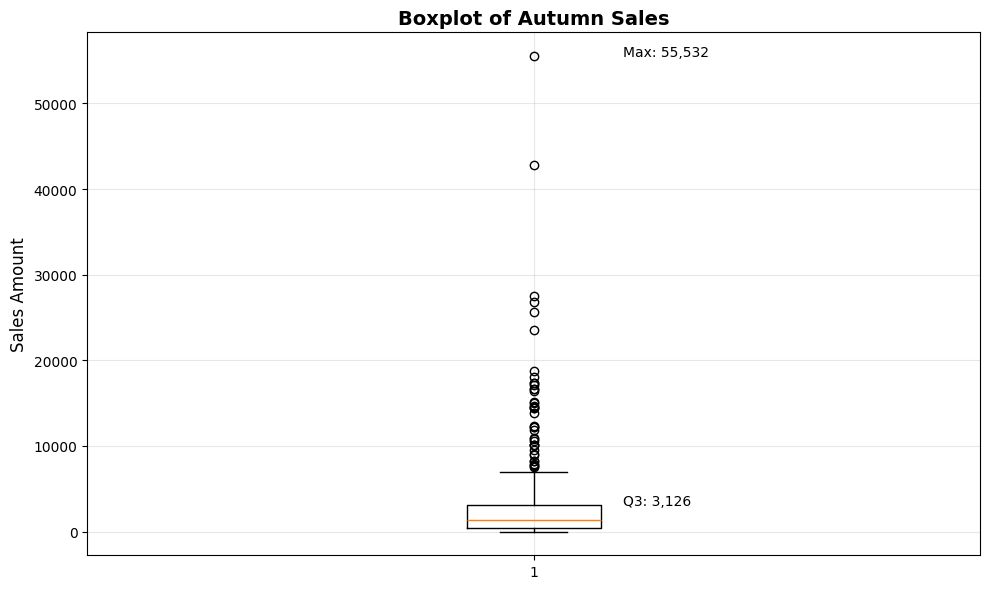

Number of outliers: 40
Outlier range: < -3,663 or > 7,199


In [31]:
# Plot the boxplot of "Autumn" column.

plt.figure(figsize=(10, 6))
plt.boxplot(inp0['Autumn'].dropna(), vert=True)
plt.title('Boxplot of Autumn Sales', fontsize=14, fontweight='bold')
plt.ylabel('Sales Amount', fontsize=12)
plt.grid(True, alpha=0.3)

# Add some statistics to the plot
stats = inp0['Autumn'].describe()
plt.text(1.1, stats['75%'], f"Q3: {stats['75%']:,.0f}", fontsize=10)
plt.text(1.1, stats['max'], f"Max: {stats['max']:,.0f}", fontsize=10)

plt.tight_layout()
plt.show()

# Display outlier information
Q1 = inp0['Autumn'].quantile(0.25)
Q3 = inp0['Autumn'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = inp0[(inp0['Autumn'] < lower_bound) | (inp0['Autumn'] > upper_bound)]['Autumn']
print(f"Number of outliers: {len(outliers)}")
print(f"Outlier range: < {lower_bound:,.0f} or > {upper_bound:,.0f}")


Which of the following season has the highest difference between the maximum value and 99th quantile of sales?
- Winter
- Summer
- Spring
- Autumn


In [32]:
# Find the maximum and 99th percentile of Winter season.

winter_max = inp0['Winter'].max()
winter_99th = inp0['Winter'].quantile(0.99)
winter_diff = winter_max - winter_99th

print("Winter Season Statistics:")
print("="*30)
print(f"Maximum value: {winter_max:,.0f}")
print(f"99th percentile: {winter_99th:,.2f}")
print(f"Difference (Max - 99th percentile): {winter_diff:,.2f}")

# Additional statistics for Winter
print(f"\nAdditional Winter statistics:")
print(f"Mean: {inp0['Winter'].mean():,.2f}")
print(f"Median: {inp0['Winter'].median():,.2f}")
print(f"75th percentile: {inp0['Winter'].quantile(0.75):,.2f}")


Winter Season Statistics:
Maximum value: 20,388
99th percentile: 8,908.42
Difference (Max - 99th percentile): 11,479.58

Additional Winter statistics:
Mean: 990.99
Median: 402.00
75th percentile: 1,096.00


In [33]:
# Find the maximum and 99th percentile of Summer season.

summer_max = inp0['Summer'].max()
summer_99th = inp0['Summer'].quantile(0.99)
summer_diff = summer_max - summer_99th

print("Summer Season Statistics:")
print("="*30)
print(f"Maximum value: {summer_max:,.0f}")
print(f"99th percentile: {summer_99th:,.2f}")
print(f"Difference (Max - 99th percentile): {summer_diff:,.2f}")

# Additional statistics for Summer
print(f"\nAdditional Summer statistics:")
print(f"Mean: {inp0['Summer'].mean():,.2f}")
print(f"Median: {inp0['Summer'].median():,.2f}")
print(f"75th percentile: {inp0['Summer'].quantile(0.75):,.2f}")


Summer Season Statistics:
Maximum value: 35,577
99th percentile: 13,954.00
Difference (Max - 99th percentile): 21,623.00

Additional Summer statistics:
Mean: 1,444.48
Median: 518.00
75th percentile: 1,475.50


In [34]:
# Find the maximum and 99th percentile of Spring season.

spring_max = inp0['Spring'].max()
spring_99th = inp0['Spring'].quantile(0.99)
spring_diff = spring_max - spring_99th

print("Spring Season Statistics:")
print("="*30)
print(f"Maximum value: {spring_max:,.0f}")
print(f"99th percentile: {spring_99th:,.2f}")
print(f"Difference (Max - 99th percentile): {spring_diff:,.2f}")

# Additional statistics for Spring
print(f"\nAdditional Spring statistics:")
print(f"Mean: {inp0['Spring'].mean():,.2f}")
print(f"Median: {inp0['Spring'].median():,.2f}")
print(f"75th percentile: {inp0['Spring'].quantile(0.75):,.2f}")


Spring Season Statistics:
Maximum value: 7,374
99th percentile: 2,656.88
Difference (Max - 99th percentile): 4,717.12

Additional Spring statistics:
Mean: 299.79
Median: 110.00
75th percentile: 308.50


In [35]:
# Find the maximum and 99th percentile of Autumn season.

autumn_max = inp0['Autumn'].max()
autumn_99th = inp0['Autumn'].quantile(0.99)
autumn_diff = autumn_max - autumn_99th

print("Autumn Season Statistics:")
print("="*30)
print(f"Maximum value: {autumn_max:,.0f}")
print(f"99th percentile: {autumn_99th:,.2f}")
print(f"Difference (Max - 99th percentile): {autumn_diff:,.2f}")

# Additional statistics for Autumn
print(f"\nAdditional Autumn statistics:")
print(f"Mean: {inp0['Autumn'].mean():,.2f}")
print(f"Median: {inp0['Autumn'].median():,.2f}")
print(f"75th percentile: {inp0['Autumn'].quantile(0.75):,.2f}")

# Summary comparison of all seasons
print("\n" + "="*60)
print("COMPARISON OF ALL SEASONS (Max - 99th percentile differences):")
print("="*60)
print(f"Winter difference: {winter_diff:,.2f}")
print(f"Summer difference: {summer_diff:,.2f}")
print(f"Spring difference: {spring_diff:,.2f}")
print(f"Autumn difference: {autumn_diff:,.2f}")

# Find which season has the highest difference
seasonal_diffs = {
    'Winter': winter_diff,
    'Summer': summer_diff, 
    'Spring': spring_diff,
    'Autumn': autumn_diff
}

highest_diff_season = max(seasonal_diffs, key=seasonal_diffs.get)
print(f"\nSeason with highest difference: {highest_diff_season} ({seasonal_diffs[highest_diff_season]:,.2f})")


Autumn Season Statistics:
Maximum value: 55,532
99th percentile: 23,960.40
Difference (Max - 99th percentile): 31,571.60

Additional Autumn statistics:
Mean: 2,846.11
Median: 1,334.00
75th percentile: 3,126.00

COMPARISON OF ALL SEASONS (Max - 99th percentile differences):
Winter difference: 11,479.58
Summer difference: 21,623.00
Spring difference: 4,717.12
Autumn difference: 31,571.60

Season with highest difference: Autumn (31,571.60)


## Bivariate Analysis 

### Numerical- Categorical analysis

Which of the following “Price” category has the lowest average value of rating?
- very-high
- Medium
- Low
- High


In [36]:
# Find the Mean of Ratings for each Price category.

# Group by Price category and calculate mean rating
price_rating_mean = inp0.groupby('Price')['Rating'].mean().sort_values(ascending=True)

print("Mean Rating by Price Category:")
print("="*40)
for price, mean_rating in price_rating_mean.items():
    print(f"{price}: {mean_rating:.3f}")

# Find the price category with lowest average rating
lowest_rating_price = price_rating_mean.index[0]
lowest_rating_value = price_rating_mean.iloc[0]

print(f"\nPrice category with lowest average rating:")
print(f"{lowest_rating_price}: {lowest_rating_value:.3f}")

# Additional statistics
print(f"\nAdditional statistics:")
print(f"Overall mean rating: {inp0['Rating'].mean():.3f}")
print(f"Rating range: {inp0['Rating'].min():.1f} - {inp0['Rating'].max():.1f}")


Mean Rating by Price Category:
High: 2.914
very-high: 3.124
Medium: 3.157
Average: 3.474
Low: 3.692

Price category with lowest average rating:
High: 2.914

Additional statistics:
Overall mean rating: 3.489
Rating range: 0.0 - 5.0


What is the median of the rating of “vintage” category in Style column?
- 4.6
- 4.7
- 4.55
- 0.00


In [37]:
# Find the median of Ratings for each Style category.

# Group by Style category and calculate median rating
style_rating_median = inp0.groupby('Style')['Rating'].median().sort_values(ascending=False)

print("Median Rating by Style Category:")
print("="*40)
for style, median_rating in style_rating_median.items():
    print(f"{style}: {median_rating:.2f}")

# Find the median rating for 'vintage' category specifically
vintage_median = style_rating_median.get('vintage', 'Category not found')
print(f"\nMedian rating for 'vintage' category: {vintage_median}")

# Additional statistics for Style vs Rating
print(f"\nAdditional Style-Rating statistics:")
style_rating_stats = inp0.groupby('Style')['Rating'].agg(['count', 'mean', 'median', 'std'])
print(style_rating_stats.round(3))


Median Rating by Style Category:
party: 4.70
work: 4.70
Casual: 4.60
Brief: 4.60
bohemian: 4.60
vintage: 4.60
Sexy: 4.55
cute: 4.55
sexy: 4.50
Others: 0.00

Median rating for 'vintage' category: 4.6

Additional Style-Rating statistics:
          count   mean  median    std
Style                                
Brief        17  4.065    4.60  1.550
Casual      219  3.518    4.60  1.999
Others       10  1.810    0.00  2.354
Sexy         66  3.320    4.55  2.138
bohemian     23  3.874    4.60  1.837
cute         44  3.270    4.55  2.149
party        51  3.712    4.70  1.975
sexy          7  3.814    4.50  1.737
vintage      25  3.168    4.60  2.226
work         17  3.912    4.70  1.872


Which of the following season has the highest average value of sale for “Recommendation” value equals to 1.
- Summer
- Spring
- Autumn
- Winter


In [38]:
# Summer sale vs Recommendation.

# Calculate mean Summer sales for each Recommendation value
summer_recommendation = inp0.groupby('Recommendation')['Summer'].agg(['mean', 'count', 'sum'])

print("Summer Sales vs Recommendation:")
print("="*40)
print(summer_recommendation)

# Focus on Recommendation = 1 (positive recommendations)
if 1 in summer_recommendation.index:
    summer_rec_1_mean = summer_recommendation.loc[1, 'mean']
    print(f"\nMean Summer sales for Recommendation = 1: {summer_rec_1_mean:,.2f}")
else:
    print("\nNo Recommendation = 1 found in data")

# Additional analysis
print(f"\nSummer sales summary by Recommendation:")
for rec_val in sorted(inp0['Recommendation'].unique()):
    subset = inp0[inp0['Recommendation'] == rec_val]
    mean_sales = subset['Summer'].mean()
    count = len(subset)
    print(f"Recommendation {rec_val}: Mean = {mean_sales:,.2f}, Count = {count}")


Summer Sales vs Recommendation:
                       mean  count     sum
Recommendation                            
0               1430.149635    274  391861
1               1463.639024    205  300046

Mean Summer sales for Recommendation = 1: 1,463.64

Summer sales summary by Recommendation:
Recommendation 0: Mean = 1,430.15, Count = 274
Recommendation 1: Mean = 1,463.64, Count = 205


In [39]:
# Spring sale vs Recommendation.

# Calculate mean Spring sales for each Recommendation value
spring_recommendation = inp0.groupby('Recommendation')['Spring'].agg(['mean', 'count', 'sum'])

print("Spring Sales vs Recommendation:")
print("="*40)
print(spring_recommendation)

# Focus on Recommendation = 1 (positive recommendations)
if 1 in spring_recommendation.index:
    spring_rec_1_mean = spring_recommendation.loc[1, 'mean']
    print(f"\nMean Spring sales for Recommendation = 1: {spring_rec_1_mean:,.2f}")
else:
    print("\nNo Recommendation = 1 found in data")

# Additional analysis
print(f"\nSpring sales summary by Recommendation:")
for rec_val in sorted(inp0['Recommendation'].unique()):
    subset = inp0[inp0['Recommendation'] == rec_val]
    mean_sales = subset['Spring'].mean()
    count = len(subset)
    print(f"Recommendation {rec_val}: Mean = {mean_sales:,.2f}, Count = {count}")


Spring Sales vs Recommendation:
                      mean  count    sum
Recommendation                          
0               298.051095    274  81666
1               302.117073    205  61934

Mean Spring sales for Recommendation = 1: 302.12

Spring sales summary by Recommendation:
Recommendation 0: Mean = 298.05, Count = 274
Recommendation 1: Mean = 302.12, Count = 205


In [40]:
# Autumn sale vs Recommendation.

# Calculate mean Autumn sales for each Recommendation value
autumn_recommendation = inp0.groupby('Recommendation')['Autumn'].agg(['mean', 'count', 'sum'])

print("Autumn Sales vs Recommendation:")
print("="*40)
print(autumn_recommendation)

# Focus on Recommendation = 1 (positive recommendations)
if 1 in autumn_recommendation.index:
    autumn_rec_1_mean = autumn_recommendation.loc[1, 'mean']
    print(f"\nMean Autumn sales for Recommendation = 1: {autumn_rec_1_mean:,.2f}")
else:
    print("\nNo Recommendation = 1 found in data")

# Additional analysis
print(f"\nAutumn sales summary by Recommendation:")
for rec_val in sorted(inp0['Recommendation'].unique()):
    subset = inp0[inp0['Recommendation'] == rec_val]
    mean_sales = subset['Autumn'].mean()
    count = len(subset)
    print(f"Recommendation {rec_val}: Mean = {mean_sales:,.2f}, Count = {count}")


Autumn Sales vs Recommendation:
                       mean  count       sum
Recommendation                              
0               2840.193431    274  778213.0
1               2854.024390    205  585075.0

Mean Autumn sales for Recommendation = 1: 2,854.02

Autumn sales summary by Recommendation:
Recommendation 0: Mean = 2,840.19, Count = 274
Recommendation 1: Mean = 2,854.02, Count = 205


In [41]:
# Winter sale vs Recommendation.

# Calculate mean Winter sales for each Recommendation value
winter_recommendation = inp0.groupby('Recommendation')['Winter'].agg(['mean', 'count', 'sum'])

print("Winter Sales vs Recommendation:")
print("="*40)
print(winter_recommendation)

# Focus on Recommendation = 1 (positive recommendations)
if 1 in winter_recommendation.index:
    winter_rec_1_mean = winter_recommendation.loc[1, 'mean']
    print(f"\nMean Winter sales for Recommendation = 1: {winter_rec_1_mean:,.2f}")
else:
    print("\nNo Recommendation = 1 found in data")

# Additional analysis
print(f"\nWinter sales summary by Recommendation:")
for rec_val in sorted(inp0['Recommendation'].unique()):
    subset = inp0[inp0['Recommendation'] == rec_val]
    mean_sales = subset['Winter'].mean()
    count = len(subset)
    print(f"Recommendation {rec_val}: Mean = {mean_sales:,.2f}, Count = {count}")

# Summary comparison of all seasons for Recommendation = 1
print("\n" + "="*60)
print("SEASON COMPARISON FOR RECOMMENDATION = 1:")
print("="*60)
try:
    print(f"Summer mean: {summer_rec_1_mean:,.2f}")
    print(f"Spring mean: {spring_rec_1_mean:,.2f}")
    print(f"Autumn mean: {autumn_rec_1_mean:,.2f}")
    print(f"Winter mean: {winter_rec_1_mean:,.2f}")
    
    # Find highest season for Recommendation = 1
    season_means = {
        'Summer': summer_rec_1_mean,
        'Spring': spring_rec_1_mean,
        'Autumn': autumn_rec_1_mean,
        'Winter': winter_rec_1_mean
    }
    highest_season = max(season_means, key=season_means.get)
    print(f"\nSeason with highest average sales for Recommendation = 1: {highest_season}")
except NameError:
    print("Please run all previous seasonal analysis cells first")


Winter Sales vs Recommendation:
                      mean  count       sum
Recommendation                             
0               985.660584    274  270071.0
1               998.107317    205  204612.0

Mean Winter sales for Recommendation = 1: 998.11

Winter sales summary by Recommendation:
Recommendation 0: Mean = 985.66, Count = 274
Recommendation 1: Mean = 998.11, Count = 205

SEASON COMPARISON FOR RECOMMENDATION = 1:
Summer mean: 1,463.64
Spring mean: 302.12
Autumn mean: 2,854.02
Winter mean: 998.11

Season with highest average sales for Recommendation = 1: Autumn


### Categorical categorical bivariate analysis


Which of the following size categories has the highest positive recommendations?
- Medium and extra large
- Extra large and small
- Free and small
- Free and medium


In [42]:
# Size vs Recommendation.

# Create a crosstab to analyze Size vs Recommendation
size_recommendation = pd.crosstab(inp0['Size'], inp0['Recommendation'], margins=True)

print("Size vs Recommendation Crosstab:")
print("="*50)
print(size_recommendation)

# Calculate percentage of positive recommendations for each size
size_rec_percentage = pd.crosstab(inp0['Size'], inp0['Recommendation'], normalize='index') * 100

print("\nPercentage of Recommendations by Size:")
print("="*50)
print(size_rec_percentage.round(2))

# Focus on positive recommendations (Recommendation = 1)
if 1 in size_rec_percentage.columns:
    positive_rec_by_size = size_rec_percentage[1].sort_values(ascending=False)
    print("\nPercentage of Positive Recommendations by Size (sorted):")
    print("="*55)
    for size, percentage in positive_rec_by_size.items():
        if size != 'All':  # Exclude the 'All' row if present
            print(f"{size}: {percentage:.1f}%")
    
    # Find sizes with highest positive recommendations
    top_sizes = positive_rec_by_size.head(2).index.tolist()
    print(f"\nTop 2 sizes with highest positive recommendations: {top_sizes}")
else:
    print("\nNo positive recommendations (1) found in data")


Size vs Recommendation Crosstab:
Recommendation    0    1  All
Size                         
Extra large      10    4   14
Free             89   76  165
Large            57   36   93
Medium           95   76  171
Small            23   13   36
All             274  205  479

Percentage of Recommendations by Size:
Recommendation      0      1
Size                        
Extra large     71.43  28.57
Free            53.94  46.06
Large           61.29  38.71
Medium          55.56  44.44
Small           63.89  36.11

Percentage of Positive Recommendations by Size (sorted):
Free: 46.1%
Medium: 44.4%
Large: 38.7%
Small: 36.1%
Extra large: 28.6%

Top 2 sizes with highest positive recommendations: ['Free', 'Medium']


### Multivariate analysis 

Which of the following pair of “Style” and “Price” category has the highest average of positive recommendations?
- Price: medium and style: vintage
- Price: medium and style: cute
- Price: very high and style: party
- Price: low and style: sexy


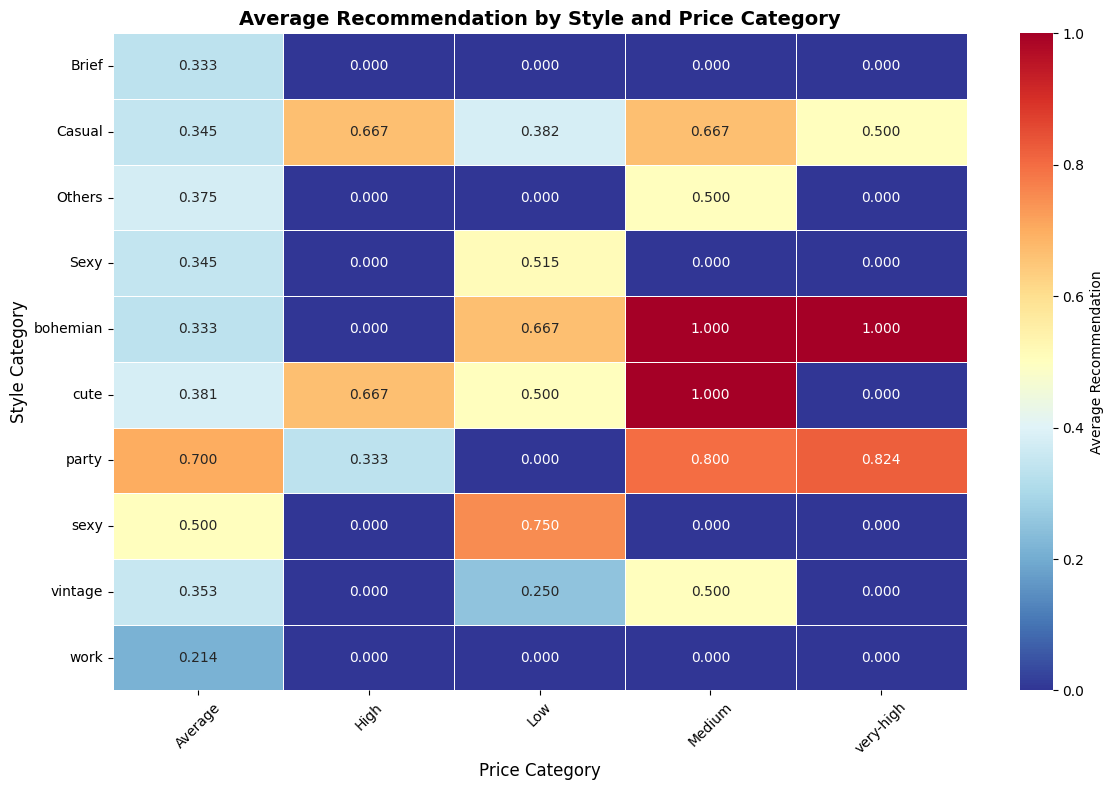


Combination with highest average recommendation:
Style: bohemian, Price: Medium
Average recommendation value: 1.000

Top 5 Style-Price combinations by average recommendation:
bohemian + Medium: 1.000
bohemian + very-high: 1.000
cute + Medium: 1.000
party + very-high: 0.824
party + Medium: 0.800


In [43]:
# Plot the heat map of Style, price and Recommendation.

# Create a pivot table for heatmap
style_price_rec = inp0.groupby(['Style', 'Price'])['Recommendation'].mean().unstack(fill_value=0)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(style_price_rec, annot=True, cmap='RdYlBu_r', fmt='.3f', 
            cbar_kws={'label': 'Average Recommendation'}, linewidths=0.5)
plt.title('Average Recommendation by Style and Price Category', fontsize=14, fontweight='bold')
plt.xlabel('Price Category', fontsize=12)
plt.ylabel('Style Category', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Find the combination with highest average positive recommendations
max_combination = style_price_rec.stack().idxmax()
max_value = style_price_rec.stack().max()

print(f"\nCombination with highest average recommendation:")
print(f"Style: {max_combination[0]}, Price: {max_combination[1]}")
print(f"Average recommendation value: {max_value:.3f}")

# Show top 5 combinations
print("\nTop 5 Style-Price combinations by average recommendation:")
print("="*60)
top_combinations = style_price_rec.stack().sort_values(ascending=False).head(5)
for (style, price), avg_rec in top_combinations.items():
    print(f"{style} + {price}: {avg_rec:.3f}")


Which of the following material type has no recommendation in summer and winter seasons?
- Mix and Milksilk
- Nylon and Rayon
- Microfiber and Silk
- Milksilk and Microfiber


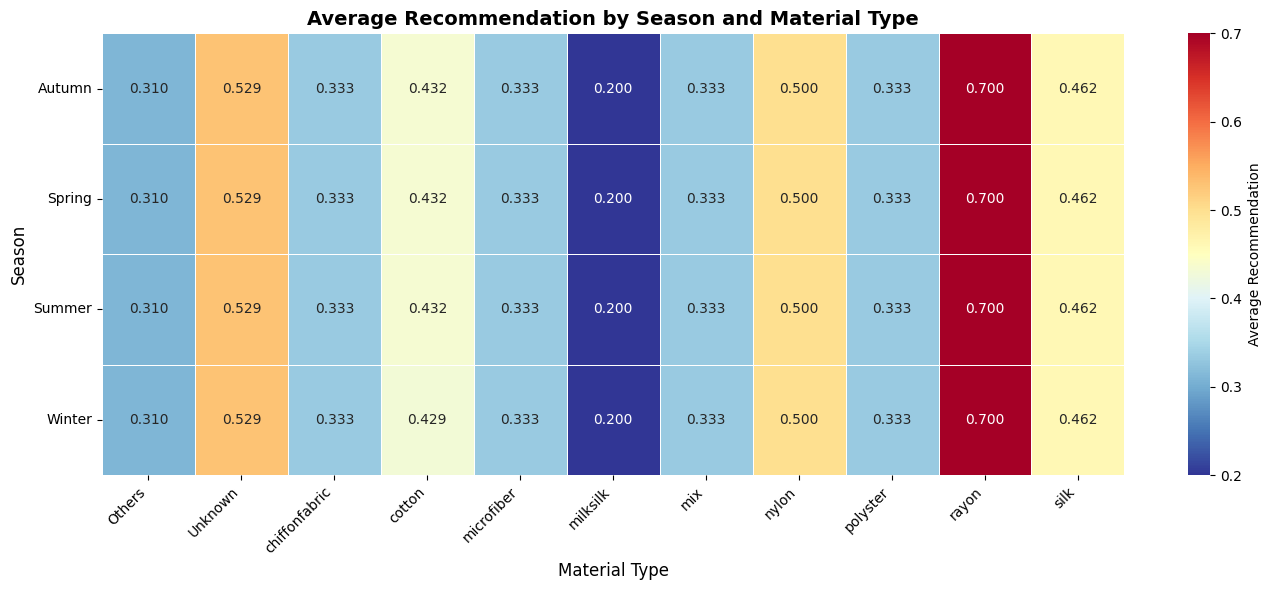


Material recommendation analysis by season:
Materials with no recommendations in both Summer and Winter:
[]

Detailed breakdown:
Others: Summer = 0.310, Winter = 0.310
Unknown: Summer = 0.529, Winter = 0.529
chiffonfabric: Summer = 0.333, Winter = 0.333
cotton: Summer = 0.432, Winter = 0.429
microfiber: Summer = 0.333, Winter = 0.333
milksilk: Summer = 0.200, Winter = 0.200
mix: Summer = 0.333, Winter = 0.333
nylon: Summer = 0.500, Winter = 0.500
polyster: Summer = 0.333, Winter = 0.333
rayon: Summer = 0.700, Winter = 0.700
silk: Summer = 0.462, Winter = 0.462


In [44]:
# Plot the heat map of Season, material and Recommendation.

# First, we need to reshape the data to have Season as a categorical variable
# Create a long format dataset with seasons
season_data = []
for season in ['Summer', 'Autumn', 'Winter', 'Spring']:
    temp_df = inp0[['Material', 'Recommendation']].copy()
    temp_df['Season'] = season
    temp_df['Sales'] = inp0[season]
    # Only include rows where there are sales in that season
    temp_df = temp_df[temp_df['Sales'] > 0]
    season_data.append(temp_df)

# Combine all season data
long_data = pd.concat(season_data, ignore_index=True)

# Create pivot table for heatmap
season_material_rec = long_data.groupby(['Season', 'Material'])['Recommendation'].mean().unstack(fill_value=0)

# Create the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(season_material_rec, annot=True, cmap='RdYlBu_r', fmt='.3f',
            cbar_kws={'label': 'Average Recommendation'}, linewidths=0.5)
plt.title('Average Recommendation by Season and Material Type', fontsize=14, fontweight='bold')
plt.xlabel('Material Type', fontsize=12)
plt.ylabel('Season', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Find materials with no recommendations in summer and winter
print("\nMaterial recommendation analysis by season:")
print("="*50)

# Check which materials have 0 recommendations in both summer and winter
summer_zero = season_material_rec.loc['Summer'] == 0
winter_zero = season_material_rec.loc['Winter'] == 0
both_zero = summer_zero & winter_zero

materials_no_rec_summer_winter = season_material_rec.columns[both_zero].tolist()

print(f"Materials with no recommendations in both Summer and Winter:")
print(materials_no_rec_summer_winter)

# Show the actual values for verification
print("\nDetailed breakdown:")
for material in season_material_rec.columns:
    summer_rec = season_material_rec.loc['Summer', material]
    winter_rec = season_material_rec.loc['Winter', material]
    print(f"{material}: Summer = {summer_rec:.3f}, Winter = {winter_rec:.3f}")
